# Begining exploration of the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Data
In this section you will find data needed to train your model and a detailed description of it.

### Files
train.csv: training dataset predict.csv: dataset to predict price for sample_submission.csv: sample submission

### Features
- id: only for test & sample submission files, id for prediction sample identification
- price: price in USD
- carat: weight of the diamond
- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color: diamond colour, from J (worst) to D (best)
- clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x: length in mm
- y: width in mm
- z: depth in mm
- depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- table: width of top of diamond relative to widest point (43--95)

In [2]:
diamonds = pd.read_csv("train.csv",index_col="id")
diamonds_test = pd.read_csv("predict.csv",index_col="id")
diamonds_submission = pd.read_csv("sample_submission.csv")

In [3]:
diamonds.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.50,Ideal,D,VS2,62.3,55.0,5.11,5.07,3.17,1845
1,1.54,Good,I,VS1,63.6,60.0,7.30,7.33,4.65,10164
2,1.32,Very Good,J,SI2,61.7,60.0,6.95,7.01,4.31,5513
3,1.20,Ideal,I,SI1,62.1,55.0,6.83,6.79,4.23,5174
4,1.73,Premium,I,SI1,61.2,60.0,7.67,7.65,4.69,10957


In [4]:
diamonds_test.head()

,carat,cut,color,clarity,depth,table,x,y,z
id,,,,,,,,,
0,0.45,Premium,E,SI1,62.8,58.0,4.88,4.84,3.05
1,1.23,Ideal,H,SI1,61.0,56.0,6.96,6.92,4.23
2,0.33,Ideal,I,IF,61.8,55.0,4.46,4.47,2.76
3,0.51,Premium,D,VS2,58.0,60.0,5.29,5.26,3.06
4,0.40,Premium,E,VS2,62.2,59.0,4.71,4.74,2.94


In [5]:
diamonds_submission.head()

,id,price
0,0,16964
1,1,6754
2,2,16579
3,3,10765
4,4,4971


Evaluation
The evaluation metric chosen for this competition is the RMSE (Root Mean Squared Error):

https://en.wikipedia.org/wiki/Root-mean-square_deviation

Submit results
Submissions are limited to 4 times a day.
The test set is divided into a public part (with which the public leaderboard is calculated, accessible during the competition) and another private part, with which the final positions are calculated, after the end of the competition.
Predictions will be sent in the format indicated in the sample_submission.csv file in the data section.

## Feature Exploration

Lets see...

In [6]:
diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

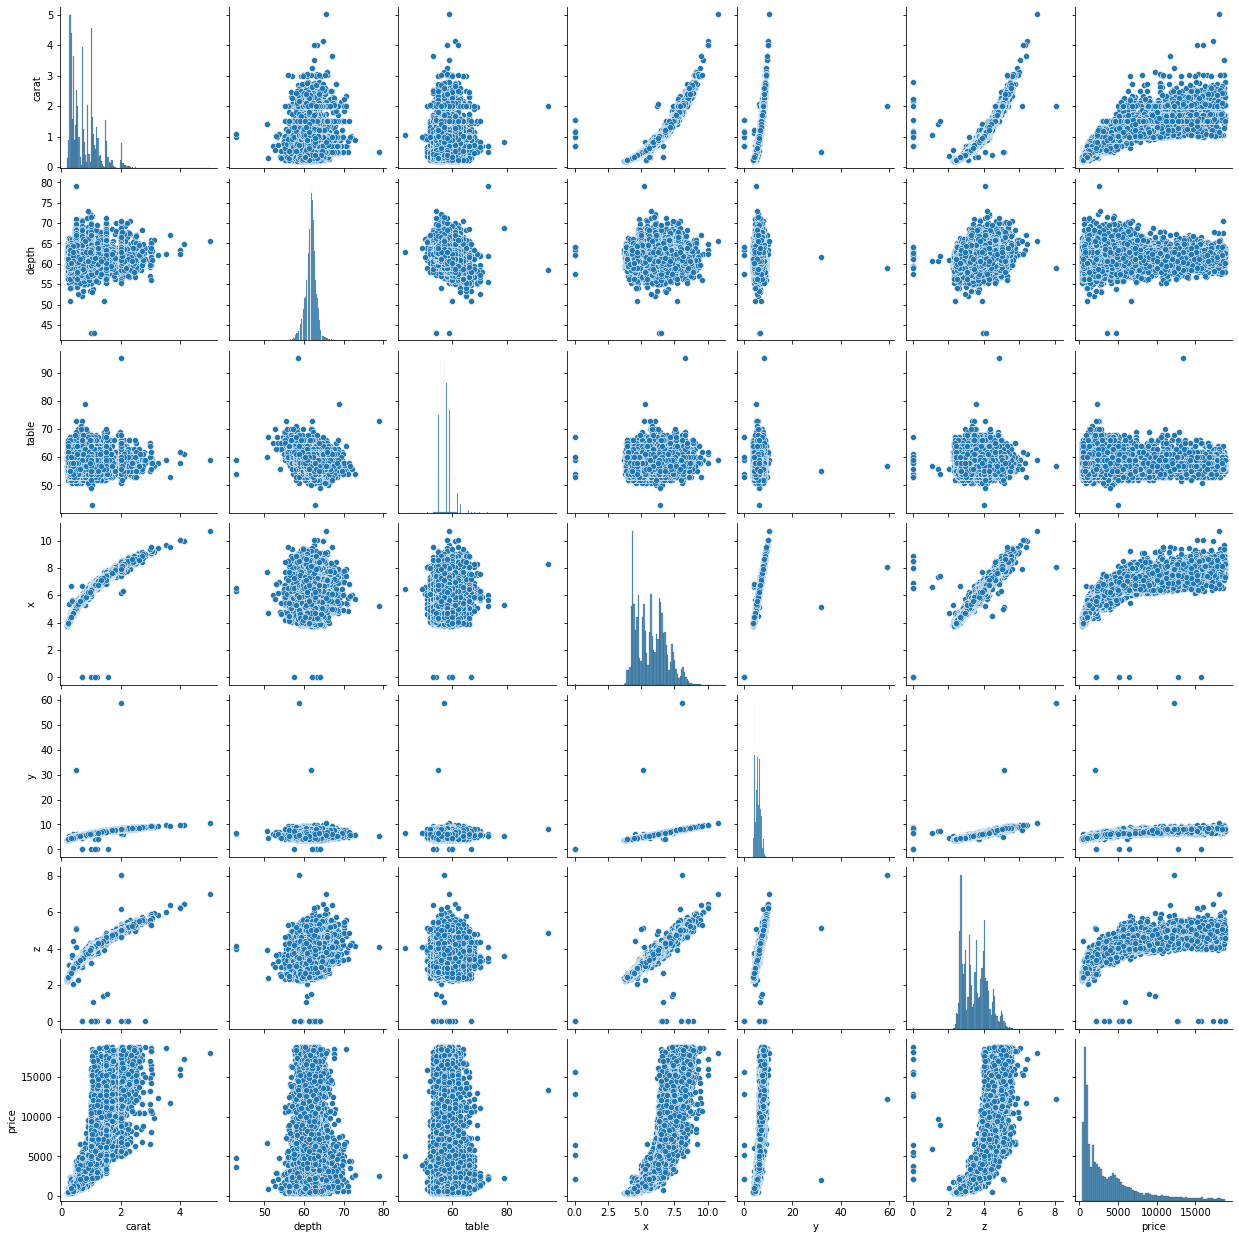

In [7]:
sns.pairplot(diamonds)

The diamonds price shape with respect to the other numerical variables hint that there is an exponential progression with carat, x, y and z. 

So we transform the price into logarithm.

In [8]:
di=diamonds.copy()
di["price"]=di["price"].apply(np.log10)

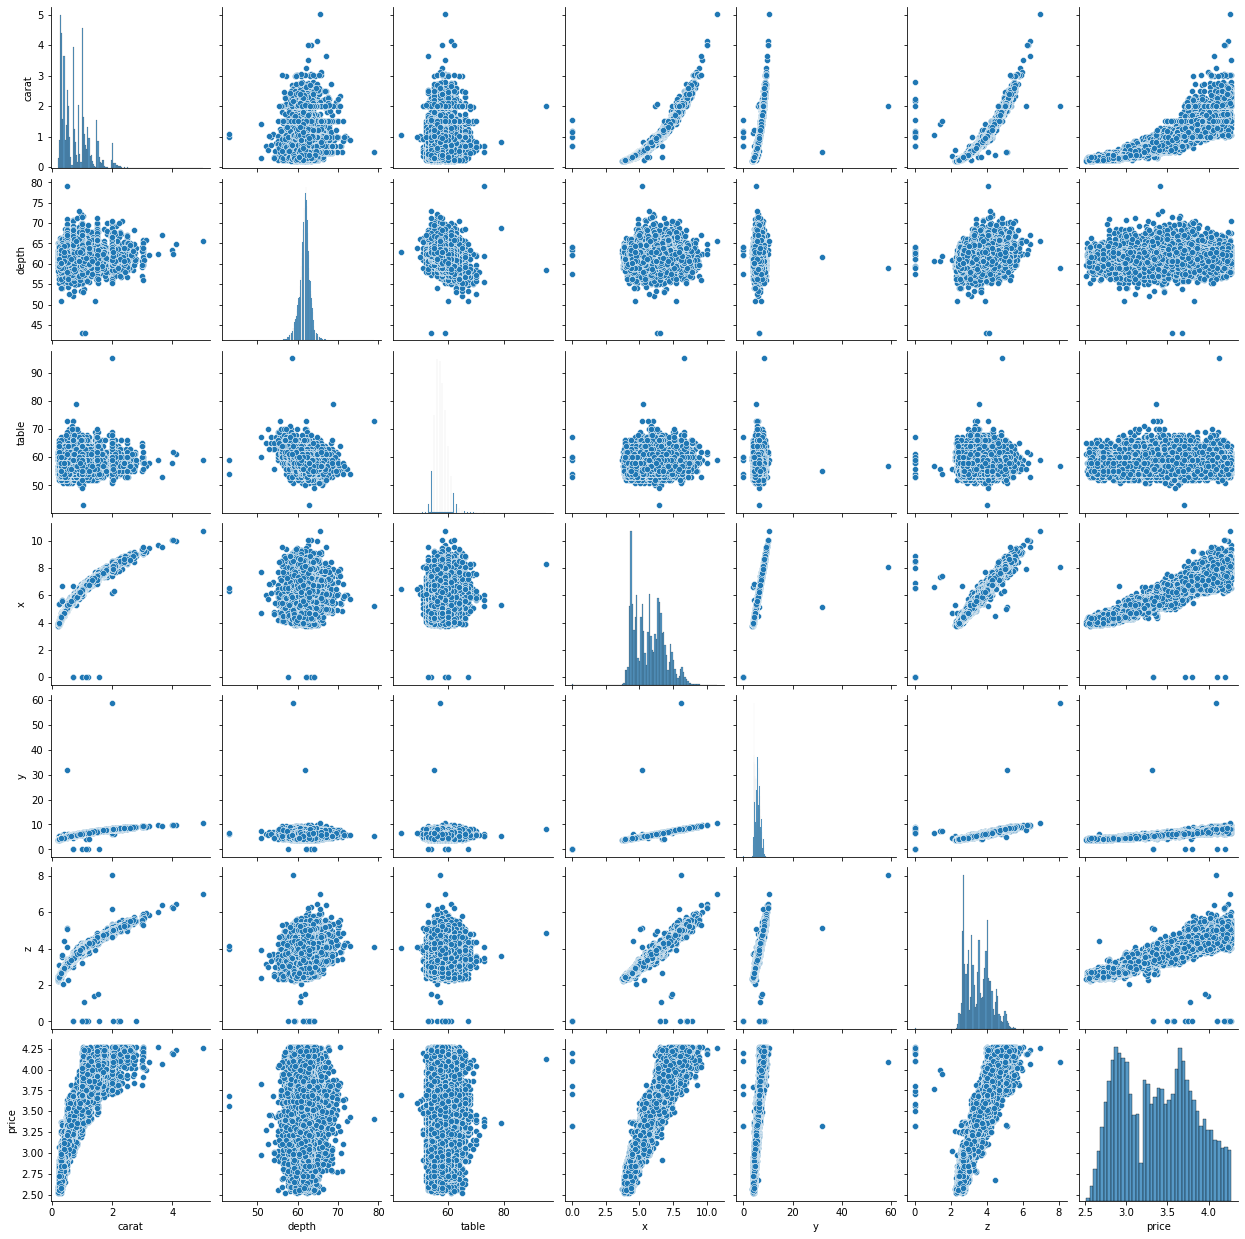

In [9]:
sns.pairplot(di)

In [10]:
di.corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.026242,0.183268,0.975538,0.944843,0.967968,0.920335
depth,0.026242,1.000000,-0.296991,-0.026495,-0.030529,0.095624,-0.000651
table,0.183268,-0.296991,1.000000,0.197330,0.184213,0.156565,0.160143
x,0.975538,-0.026495,0.197330,1.000000,0.967690,0.985338,0.958171
y,0.944843,-0.030529,0.184213,0.967690,1.000000,0.960890,0.928891
z,0.967968,0.095624,0.156565,0.985338,0.960890,1.000000,0.949079
price,0.920335,-0.000651,0.160143,0.958171,0.928891,0.949079,1.000000


Looking at the correlation (with respect to log and linear price), depth and table do not seem to be correlated with the price, so we can exclude them.

### Categorical

In [11]:
di.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.50,Ideal,D,VS2,62.3,55.0,5.11,5.07,3.17,3.265996
1,1.54,Good,I,VS1,63.6,60.0,7.30,7.33,4.65,4.007065
2,1.32,Very Good,J,SI2,61.7,60.0,6.95,7.01,4.31,3.741388
3,1.20,Ideal,I,SI1,62.1,55.0,6.83,6.79,4.23,3.713826
4,1.73,Premium,I,SI1,61.2,60.0,7.67,7.65,4.69,4.039692


In [12]:
di["cut"].value_counts() 

Ideal        16152
Premium      10321
Very Good     9040
Good          3729
Fair          1213
Name: cut, dtype: int64

In [13]:
di["color"].value_counts() 

G    8469
E    7282
F    7199
H    6210
D    5098
I    4091
J    2106
Name: color, dtype: int64

In [14]:
di["clarity"].value_counts() 

SI1     9758
VS2     9272
SI2     6895
VS1     6151
VVS2    3799
VVS1    2692
IF      1321
I1       567
Name: clarity, dtype: int64

In [15]:
diamonds=diamonds_test.drop(columns=["depth","table"])

In [16]:
diamonds = pd.get_dummies(diamonds_test,drop_first=True)

In [17]:
dims=["x","y","z"]
for i in range(len(dims)):
    for j in range(i,len(dims)):
        col1 = dims[i]
        col2 = dims[j]
        diamonds_test[f"{col1}*{col2}"] = diamonds_test[col1]*diamonds_test[col2]

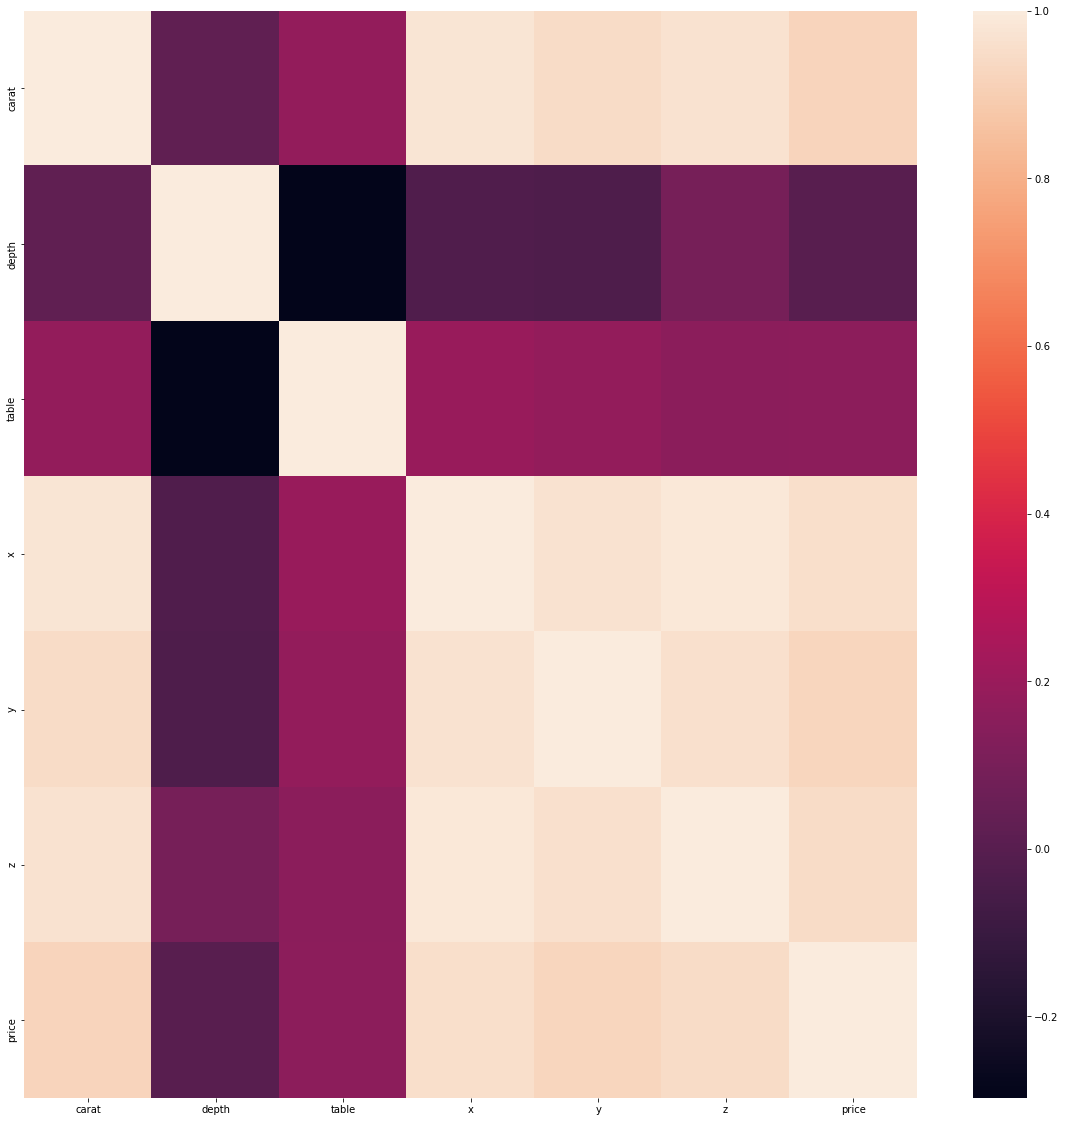

In [18]:
plt.figure(figsize = (20,20))
sns.heatmap(di.corr());

In [19]:
di.corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.026242,0.183268,0.975538,0.944843,0.967968,0.920335
depth,0.026242,1.000000,-0.296991,-0.026495,-0.030529,0.095624,-0.000651
table,0.183268,-0.296991,1.000000,0.197330,0.184213,0.156565,0.160143
x,0.975538,-0.026495,0.197330,1.000000,0.967690,0.985338,0.958171
y,0.944843,-0.030529,0.184213,0.967690,1.000000,0.960890,0.928891
z,0.967968,0.095624,0.156565,0.985338,0.960890,1.000000,0.949079
price,0.920335,-0.000651,0.160143,0.958171,0.928891,0.949079,1.000000


In [20]:
di.corr()["price"].sort_values(ascending=False)

price    1.000000
x        0.958171
z        0.949079
y        0.928891
carat    0.920335
table    0.160143
depth   -0.000651
Name: price, dtype: float64

Better dumies

- clarity IF: (VS1, VVS2, VVS1,) best IF OR other
- cut IF: (Premium, Ideal) best IF OR other
- color IF; (D,E,F)  best OR other

In [21]:
#di = diamonds.copy()
di.head()


,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.50,Ideal,D,VS2,62.3,55.0,5.11,5.07,3.17,3.265996
1,1.54,Good,I,VS1,63.6,60.0,7.30,7.33,4.65,4.007065
2,1.32,Very Good,J,SI2,61.7,60.0,6.95,7.01,4.31,3.741388
3,1.20,Ideal,I,SI1,62.1,55.0,6.83,6.79,4.23,3.713826
4,1.73,Premium,I,SI1,61.2,60.0,7.67,7.65,4.69,4.039692


In [22]:
X = di.drop(columns=["price"])

In [23]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
id,,,,,,,,,
0,0.50,Ideal,D,VS2,62.3,55.0,5.11,5.07,3.17
1,1.54,Good,I,VS1,63.6,60.0,7.30,7.33,4.65
2,1.32,Very Good,J,SI2,61.7,60.0,6.95,7.01,4.31
3,1.20,Ideal,I,SI1,62.1,55.0,6.83,6.79,4.23
4,1.73,Premium,I,SI1,61.2,60.0,7.67,7.65,4.69


## To deliver

In [24]:

linreg_f = linear_model.LinearRegression().fit(X_train, y_train)
linreg_f.fit(X, y)
y_pred = linreg_f.predict(X)
print("RMSE (train) =",mean_squared_error(10**y.values, 10**y_pred, squared=False))

NameError: name 'linear_model' is not defined

In [ ]:
diamonds = pd.read_csv("predict.csv",index_col="id")

diamonds=diamonds_test.drop(columns=["depth","table"])

diamonds = pd.get_dummies(diamonds_test,drop_first=True)
diamonds.head()

dims=["x","y","z"]
for i in range(len(dims)):
    for j in range(i,len(dims)):
        col1 = dims[i]
        col2 = dims[j]
        diamonds_test[f"{col1}*{col2}"] = diamonds_test[col1]*diamonds_test[col2]

In [ ]:
diamonds = pd.read_csv("train.csv",index_col="id")
diamonds["price"]=diamonds["price"].apply(np.log10)

In [ ]:
diamonds[3.8<diamonds["price"]].corr()

In [ ]:
diamonds[diamonds["price"]<3.8].corr()

In [ ]:
#di["clarity_good"] = di["clarity"].apply(lambda x: 1 if x in ["VS1", "VVS2", "VVS1"] else 0)
#di["cut_good"] = di["cut"].apply(lambda x: 1 if x in ["Premium", "Ideal"] else 0)
#di["color_good"] = di["color"].apply(lambda x: 1 if x in ["D", "E", "F"] else 0)